In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('tested.csv', sep = ',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
del df['Name']  
del df['PassengerId']
df = df.drop('Cabin', axis=1)
df = df.drop('Ticket', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [3]:
df['SumRelatives'] = df['SibSp'] + df['Parch']
RepList = {'Q': 1, 'C': 2, 'S': 3}
SexList = {'male': 0, 'female': 1}
df['Embarked'] = df['Embarked'].replace(RepList)
df['Sex'] = df['Sex'].replace(SexList)


df = df.fillna(df.median())
df = df.dropna()

rows_with_missing_values = df[df.isna().any(axis=1)].index
print(rows_with_missing_values)

print(df[df['Survived'] == 1].count())
print(df[df['Survived'] == 0].count())

Index([], dtype='int64')
Survived        152
Pclass          152
Sex             152
Age             152
SibSp           152
Parch           152
Fare            152
Embarked        152
SumRelatives    152
dtype: int64
Survived        266
Pclass          266
Sex             266
Age             266
SibSp           266
Parch           266
Fare            266
Embarked        266
SumRelatives    266
dtype: int64


Удалили все ненужные данные и изменили

In [4]:
threshold = 0.1
low_variance_columns = df.columns[df.var() < threshold]
df.drop(low_variance_columns, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SumRelatives
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,3,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,3,0
4,1,3,1,22.0,1,1,12.2875,3,2


ничего не поменялочь

In [5]:
correlation_matrix = df.corr()
correlation_threshold = 0.8

highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

df_filtered = df.drop(columns=highly_correlated_columns)
df_filtered.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,34.5,0,0,7.8292,1
1,1,3,47.0,1,0,7.0000,3
2,0,2,62.0,0,0,9.6875,1
3,0,3,27.0,0,0,8.6625,3
4,1,3,22.0,1,1,12.2875,3


-Sex -SumRelatives

In [6]:
X = df.drop(columns=['Survived'])  # Признаки
y = df['Survived']  # Целевая переменная

# Инициализация SelectKBest с тестом f_classif
selector = SelectKBest(score_func=f_classif, k='all')

# Применение SelectKBest к данным
X_new = selector.fit_transform(X, y)

# Получение индексов выбранных признаков
selected_indices = selector.get_support(indices=True)

df_filtered = df.iloc[:, selected_indices]

df_filtered.head()

/Users/andrejsmirnov/PycharmProjects/ML2/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,3
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,3
4,1,3,1,22.0,1,1,12.2875,3


-SumRelatives

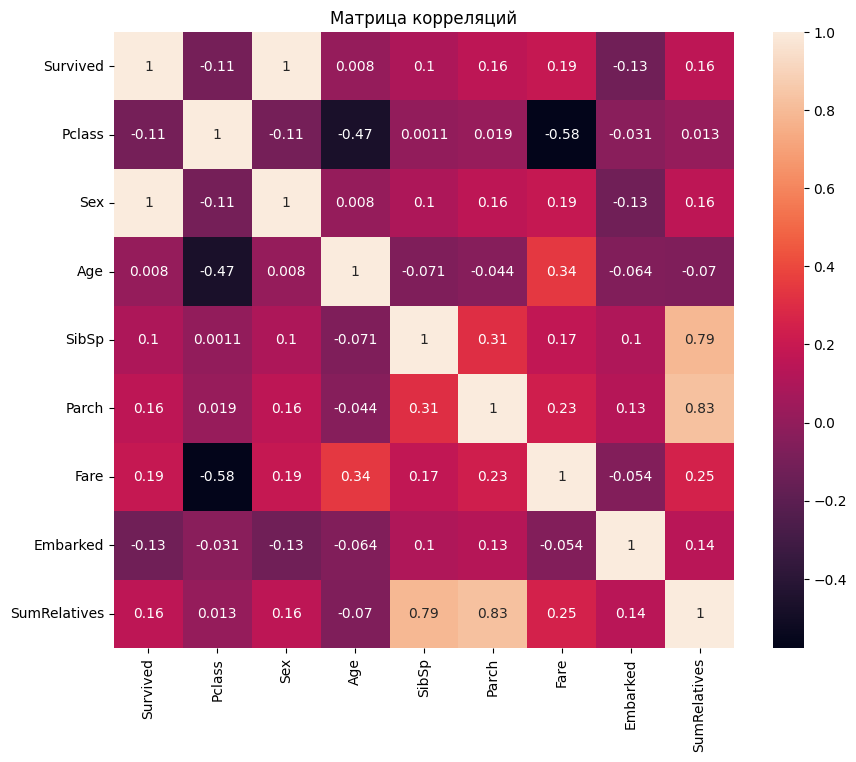

In [7]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True)

plt.title("Матрица корреляций")
plt.show()



In [8]:
# Данные
'''df = pd.read_csv('DataSet2_1.csv', sep = '|')
df.dropna(inplace=True)'''

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модели
'''model = LogisticRegression(random_state=32)
model.fit(X_train, y_train)'''

'''model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)'''

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)



# Предсказания
y_pred = model.predict(X_test)

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [9]:
print(df[df['Survived'] == 1].count())
print(df[df['Survived'] == 0].count())

Survived        152
Pclass          152
Sex             152
Age             152
SibSp           152
Parch           152
Fare            152
Embarked        152
SumRelatives    152
dtype: int64
Survived        266
Pclass          266
Sex             266
Age             266
SibSp           266
Parch           266
Fare            266
Embarked        266
SumRelatives    266
dtype: int64
